<a href="https://colab.research.google.com/github/Haaris-Rahman/ML-Notebooks/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import the usual libraries
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='html5')

%matplotlib inline

In [2]:
def init():
  pass
  
def animate_2d(i):

  y_true = w[0] * x_plot + w[1] 
  w_pred = w_history[i]
  y_pred = w_pred[0] * x_plot + w_pred[1] 
  ax.clear()
  ax.set_title(f"Epoch {i} Weight {w_pred}")
  ax.plot(x_plot, y_true, label = "Ground Truth")
  ax.plot(x_plot, y_pred, label = "Fitted")
  ax.scatter(x_train[0], y_train)
  ax.scatter(x_test[0], y_test)
  ax.legend()

def animate_3d(i):

  y_true = w[0] * xx + w[1] * yy + w[2]
  w_pred = w_history[i]
  y_pred = w_pred[0] * xx + w_pred[1] * yy + w_pred[2]

  ax.clear()
  ax.azim = angles[i]
  ax.set_title(f"Epoch {i} Weight {w_pred}")
  ax.plot_surface(xx, yy, y_true, alpha=0.5, label = "Ground Truth")
  ax.plot_surface(xx, yy, y_pred, alpha=0.2, label = "Fitted")
  ax.scatter(x_train[0], x_train[1], y_train.reshape(-1,1))
  ax.scatter(x_test[0], x_test[1], y_test.reshape(-1,1))
  # ax.legend()


In [3]:
np.random.seed(30)

In [4]:
class LinearRegression():
  def __init__(self, dim, lr = 0.1):
    assert isinstance
    self.lr = lr
    self.w = np.zeros((dim,1))
    self.grads = {"dw": np.zeros((dim))}

  def forward(self, x):
    y = self.w.T @ x
    return y
  
  def backward(self, x, y_hat, y):
    assert y_hat.shape == y.shape
    self.grads["dw"] =   (1 / x.shape[1]) * ((y_hat - y) @ x.T).T
    assert self.grads["dw"].shape == self.w.shape
    
    # print(self.grads["dw"])

  def optimize(self):
    self.w = self.w - self.lr * self.grads["dw"]

### Data from the same distribution

A [2.]
B [2.]
Epoch 0 | Train Loss 82.25494964307106 | Test Loss 12.530375379500228
Epoch 2 | Train Loss 17.376012504579442 | Test Loss 3.154638242567267
Epoch 4 | Train Loss 6.956327722693647 | Test Loss 1.2692928110230237
Epoch 6 | Train Loss 3.224882117013539 | Test Loss 0.5785176772257331
Epoch 8 | Train Loss 1.5261102992342335 | Test Loss 0.27142397409351354
Epoch 10 | Train Loss 0.724097788298985 | Test Loss 0.12834980491917516
Epoch 12 | Train Loss 0.34367807531591266 | Test Loss 0.060843440641133104
Epoch 14 | Train Loss 0.1631264675584223 | Test Loss 0.028866509791083687
Epoch 16 | Train Loss 0.07742822365786244 | Test Loss 0.013699376650671533
Epoch 18 | Train Loss 0.03675144705394587 | Test Loss 0.00650207098681876
Epoch 20 | Train Loss 0.01744414255609919 | Test Loss 0.003086158976244471
Epoch 22 | Train Loss 0.008279894726455541 | Test Loss 0.0014648408256308387
Epoch 24 | Train Loss 0.003930067445239355 | Test Loss 0.0006952876964168519
Epoch 26 | Train Loss 0.00186541382

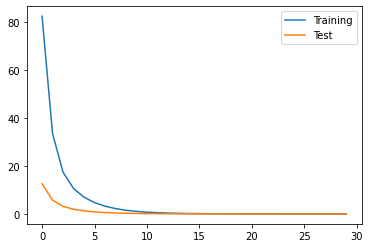

In [5]:
# Hyperparameters
num_samples = 50
num_train = int(0.7 * num_samples)
num_epochs = 30

# Trying to fit the line y = Ax + B
w = np.random.randint(-3, 3, size = (2,1)).astype(float)
print(f"A {w[0]}")
print(f"B {w[1]}")

# Generate training data
x = np.random.normal(loc = 0, scale = 0.5, size = (num_samples,1))
ones = np.ones((num_samples, 1))
x_stack = np.hstack([x, ones])


x_train = x_stack[:num_train].T
y_train = w.T @ x_train 


x_test = x_stack[num_train:].T
y_test = w.T @ x_test



train_loss_history = []
test_loss_history = []
w_history = []


model = LinearRegression(dim = 2, lr = 0.5)

for i in range(num_epochs):
  y_hat = model.forward(x_train)
  train_loss = 1/2 * ((y_train - y_hat) ** 2).sum()

  w_history.append(model.w)

  model.backward(x_train,y_hat,y_train)
  model.optimize()

  y_hat = model.forward(x_test)
  test_loss = 1/2 * ((y_test - y_hat) ** 2).sum()

  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)

  if i % 2 == 0:
    print(f"Epoch {i} | Train Loss {train_loss} | Test Loss {test_loss}")

plt.plot(range(num_epochs), train_loss_history, label = "Training")
plt.plot(range(num_epochs), test_loss_history, label = "Test")
plt.legend()
plt.show()

In [6]:
x_plot = np.linspace(-1,1,10)
fig = plt.figure()
ax = plt.subplot()
plt.close()
# run the animation
ani = FuncAnimation(fig, animate_2d, frames=num_epochs, init_func=init, interval=200,)
ani

### Solved using Least Squares and compare to SGD

In [7]:
W = np.linalg.inv(x_train @ x_train.T)  @ x_train @  (y_train.T)

print(W)
print(model.w)

[[2.]
 [2.]]
[[1.9916692 ]
 [1.99888494]]


### Data from different distribution (Overfitting)

Epoch 0 | Train Loss 81.91031959207034 | Test Loss 15.206417713180077
Epoch 2 | Train Loss 17.7634895164587 | Test Loss 5.820509127604954
Epoch 4 | Train Loss 7.245263046946594 | Test Loss 3.9453099633235054
Epoch 6 | Train Loss 3.44046248665259 | Test Loss 3.281546224113068
Epoch 8 | Train Loss 1.7052884307321203 | Test Loss 3.0001380259751276
Epoch 10 | Train Loss 0.8859031197203339 | Test Loss 2.877207877496019
Epoch 12 | Train Loss 0.4972317484039249 | Test Loss 2.8245002955637446
Epoch 14 | Train Loss 0.31276314034526653 | Test Loss 2.8030958469957525
Epoch 16 | Train Loss 0.2252056649766091 | Test Loss 2.7953767630098296
Epoch 18 | Train Loss 0.18364639950425643 | Test Loss 2.793385095401474
Epoch 20 | Train Loss 0.16392021995116995 | Test Loss 2.793589996259956
Epoch 22 | Train Loss 0.15455715229253905 | Test Loss 2.7944793446513407
Epoch 24 | Train Loss 0.15011295480911402 | Test Loss 2.7954471081023726
Epoch 26 | Train Loss 0.14800350820084965 | Test Loss 2.7962823550385014
Ep

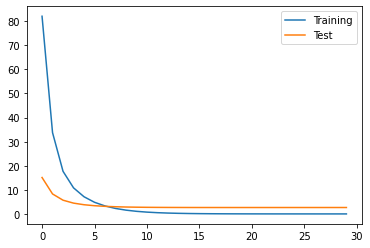

In [8]:

# Should we generate new data or use the old data for comparison?

# # Hyperparameters
# num_samples = 100
# num_train = int(0.7 * num_samples)
# num_epochs = 100

# # Trying to fit the line y = Ax + B
# w = np.random.randint(-3, 3, size = (2,1)).astype(float)
# print(f"A {w[0]}")
# print(f"B {w[1]}")

# # Generate training data
# x = np.random.normal(loc = 0, scale = 0.5, size = (num_samples,1))
# ones = np.ones((num_samples, 1))
# x_stack = np.hstack([x, ones])

# Add noise to both train and test
x_train = x_stack[:num_train].T
y_train = w.T @ x_train + np.random.normal(loc = 0, scale = 0.1, size = num_train)


x_test = x_stack[num_train:].T
y_test = w.T @ x_test + np.random.normal(loc = 0, scale = 0.6, size = num_samples - num_train)



train_loss_history = []
test_loss_history = []
w_history = []


model = LinearRegression(dim = 2, lr = 0.5)

for i in range(num_epochs):
  y_hat = model.forward(x_train)
  train_loss = 1/2 * ((y_train - y_hat) ** 2).sum()

  w_history.append(model.w)

  model.backward(x_train,y_hat,y_train)
  model.optimize()

  y_hat = model.forward(x_test)
  test_loss = 1/2 * ((y_test - y_hat) ** 2).sum()

  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)

  if i % 2 == 0:
    print(f"Epoch {i} | Train Loss {train_loss} | Test Loss {test_loss}")

plt.plot(range(num_epochs), train_loss_history, label = "Training")
plt.plot(range(num_epochs), test_loss_history, label = "Test")
plt.legend()
plt.show()

In [9]:
x_plot = np.linspace(-1,1,10)
fig = plt.figure()
ax = plt.subplot()
plt.close()
# run the animation
ani = FuncAnimation(fig, animate_2d, frames=num_epochs, init_func=init, interval=200,)
ani

### 3D multiple regression with high learning rate

Epoch 0 | Train Loss 34.29973987032996 | Test Loss 12.698436970922991
Epoch 10 | Train Loss 746.3185411858192 | Test Loss 358.562608321611
Epoch 20 | Train Loss 24419.323783752887 | Test Loss 11749.26328932645
Epoch 30 | Train Loss 800867.9318070416 | Test Loss 384943.9910339218
Epoch 40 | Train Loss 26266251.698730588 | Test Loss 12621262.851923324
Epoch 50 | Train Loss 861460553.6207652 | Test Loss 413915326.3017189
Epoch 60 | Train Loss 28253528351.36185 | Test Loss 13575106812.11293
Epoch 70 | Train Loss 926637744424.7832 | Test Loss 445224984161.656
Epoch 80 | Train Loss 30391160307998.715 | Test Loss 14602144378033.883
Epoch 90 | Train Loss 996746172302559.5 | Test Loss 478909994660501.94


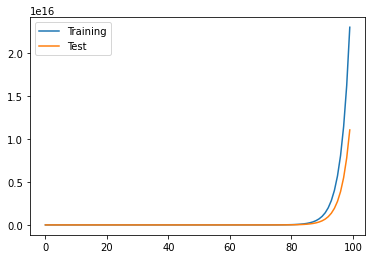

In [10]:
# Hyperparameters
num_samples = 100
num_train = int(0.7 * num_samples)
num_epochs = 100
dim = 3

# Trying to fit the line y = Ax1 + Bx2 + c
w = np.random.randint(-3, 3, size = (dim,1)).astype(float)

# Generate training data
x = np.random.normal(loc = 0, scale = 1, size = (num_samples,2))
ones = np.ones((num_samples, 1))
x_stack = np.hstack([x, ones])


x_train = x_stack[:num_train].T
y_train = w.T @ x_train


x_test = x_stack[num_train:].T
y_test = w.T @ x_test + np.random.normal(loc = 0, scale = 0.2 , size = num_samples - num_train)



train_loss_history = []
test_loss_history = []
w_history = []


model = LinearRegression(dim = dim, lr = 2)

for i in range(num_epochs):
  y_hat = model.forward(x_train)
  train_loss = 1/2 * ((y_train - y_hat) ** 2).sum()

  w_history.append(model.w)

  model.backward(x_train,y_hat,y_train)
  model.optimize()

  y_hat = model.forward(x_test)
  test_loss = 1/2 * ((y_test - y_hat) ** 2).sum()

  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)

  if i % 10 == 0:
    print(f"Epoch {i} | Train Loss {train_loss} | Test Loss {test_loss}")

plt.plot(range(num_epochs), train_loss_history, label = "Training")
plt.plot(range(num_epochs), test_loss_history, label = "Test")
plt.legend()
plt.show()

In [11]:
# Do you want to rotate the 3D plane??
angles = np.linspace(-60,60, num_epochs)
fig = plt.figure()
ax = fig.gca(projection='3d')
xx, yy = np.meshgrid(range(-2,3),range(-2,3))
plt.close()
# run the animation
ani = FuncAnimation(fig, animate_3d, frames=num_epochs, init_func=init, interval=200,)
ani

### Lower the learning rate

Epoch 0 | Train Loss 34.29973987032996 | Test Loss 8.095125244530212
Epoch 10 | Train Loss 4.346296963406692 | Test Loss 1.357191290987867
Epoch 20 | Train Loss 0.6354422722047353 | Test Loss 0.577448546725004
Epoch 30 | Train Loss 0.10841552249188971 | Test Loss 0.5003814236148908
Epoch 40 | Train Loss 0.021006468804432007 | Test Loss 0.5035382295431836
Epoch 50 | Train Loss 0.004423983911951978 | Test Loss 0.5109523052179242
Epoch 60 | Train Loss 0.0009763636539296937 | Test Loss 0.5153711624316784
Epoch 70 | Train Loss 0.00022076073931739313 | Test Loss 0.5175898522946066
Epoch 80 | Train Loss 5.0521477933667895e-05 | Test Loss 0.5186517866852555
Epoch 90 | Train Loss 1.163119776227275e-05 | Test Loss 0.5191535958691665


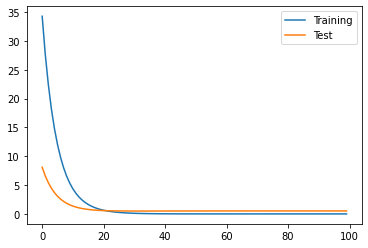

In [12]:
train_loss_history = []
test_loss_history = []
w_history = []


model = LinearRegression(dim = dim, lr = 0.1)

for i in range(num_epochs):
  y_hat = model.forward(x_train)
  train_loss = 1/2 * ((y_train - y_hat) ** 2).sum()

  w_history.append(model.w)

  model.backward(x_train,y_hat,y_train)
  model.optimize()

  y_hat = model.forward(x_test)
  test_loss = 1/2 * ((y_test - y_hat) ** 2).sum()

  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)

  if i % 10 == 0:
    print(f"Epoch {i} | Train Loss {train_loss} | Test Loss {test_loss}")

plt.plot(range(num_epochs), train_loss_history, label = "Training")
plt.plot(range(num_epochs), test_loss_history, label = "Test")
plt.legend()
plt.show()

In [13]:
# Do you want to rotate the 3D plane??
angles = np.linspace(-60,60, num_epochs)
fig = plt.figure()
ax = fig.gca(projection='3d')
xx, yy = np.meshgrid(range(-2,3),range(-2,3))
plt.close()
# run the animation
ani = FuncAnimation(fig, animate_3d, frames=num_epochs, init_func=init, interval=200,)
ani

In [14]:
# function that draws each frame of the animation
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='html5')
lr = LinearRegression(3, lr = 0.8)
losses = []
w = np.array([-2,2,2]).reshape(3, 1)
x = np.random.rand(100,2)
x_stack = np.hstack([x, np.ones((x.shape[0], 1))]).T
y = np.sum(w * x_stack, axis = 0, keepdims=True).astype(float)
y_test = y + np.random.normal(0, scale = 0.1, size =y.shape)
x = x_stack
fig = plt.figure()
plt3d = fig.gca(projection='3d')
plt.close()
def init():
  pass
def animate(i):


  y_hat = lr.forward(x)
  plt3d.clear()
  plt3d.set_xlim(xmin= 0 ,xmax = 1)
  plt3d.set_ylim(ymin = 0 , ymax = 1)
  plt3d.set_zlim(zmin = 0, zmax = 4)
  plt3d.set_title(f"Epoch {i} Weight {lr.w}")
  xx, yy = np.meshgrid(range(2),range(2))

  z =  w[0] * xx + w[1] * yy + w[2]
  z_pred = lr.w[0] * xx + lr.w[1] * yy + lr.w[2]
  # plot the surface

  plt3d.plot_surface( xx, yy, z, alpha=0.5)
  plt3d.plot_surface( xx,  yy, z_pred, alpha=0.2)
  plt3d.scatter(x[0], x[1], y)
  # plt3d.plot_surface(xx, yy, lr.w[-1].reshape(-1,1), alpha=0.2)


  loss = 1/2 * ((y_test - y_hat) ** 2).sum()
  losses.append(loss)
  lr.backward(x,y_hat,y_test)
  lr.optimize()

# run the animation
ani = FuncAnimation(fig, animate, frames=100, init_func=init, interval=20,)

In [15]:
ani

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The `zmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
/usr/local/